In [257]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
np.random.seed(1)

In [258]:
n1, n2 = 100, 50
a1, a2 = np.array((-1,-1,-1)), np.array((3,3,3))
r1, r2 = np.array(((4,1,1),(1,2,0.1),(1,0.1,2))), np.array(((4,-1,-1),(-1,2,0.1),(-1,0.1,2)))

In [259]:
params = {
    'n_neighbors': range(2, 10, 1),
    'metric': ['euclidean','manhattan','minkowski'],
    'weights' : ['uniform', 'distance']
}

In [260]:
data1 = np.random.multivariate_normal(a1,r1,n1)
data2 = np.random.multivariate_normal(a2,r2,n2)
data = np.concatenate((data1,data2))
data1.shape, data2.shape, data.shape
df = pd.DataFrame(data=data, columns=['x','y','z'])
df['class'] = np.random.randint(low=0, high=2, size=n1+n2)

In [261]:
df.head()

,x,y,z,class
0,-4.413648,-1.199076,-2.391609,0
1,-0.191452,0.600945,2.287935,0
2,-4.183111,-1.754191,-3.238056,1
3,-1.644415,-0.752604,2.097569,1
4,0.239071,-1.212813,-1.961473,0


In [262]:
X_train, X_test, y_train, y_test = train_test_split(df[['x','y','z']].values,\
                                                    df['class'].values, test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 3), (75, 3), (75,), (75,))

In [263]:
model = KNN()
clf = GridSearchCV(model, params, cv=5, verbose=1, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.2s finished


In [264]:
clf.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights='distance')

In [265]:
y_pred = clf.predict(X_test)
y_pred_for_graph = clf.predict(df[['x','y','z']].values)
y_pred_for_graph.shape

(150,)

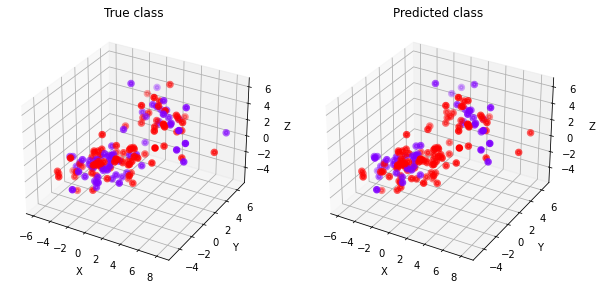

In [266]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(df.x.values,\
           df.y.values,\
           df.z.values,\
           c=df['class'].values,\
           cmap=plt.cm.rainbow, \
           linewidths=3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('True class')

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.scatter(df.x.values,\
           df.y.values,\
           df.z.values,\
           c=y_pred_for_graph,\
           cmap=plt.cm.rainbow, \
           linewidths=3)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Predicted class')
fig.savefig('data/3dscatter-normal.jpeg',dpi=500)
fig.savefig('data/3dscatter-normal.svg')

In [267]:
print(f'accuracy metrics: {accuracy_score(y_pred, y_test)}')

accuracy metrics: 0.5066666666666667


In [268]:
abalone = pd.read_csv('data/abalone.data', usecols=['Sex','Length','Diameter','Height'])
abalone.Sex = abalone.Sex.map({'M':0,'F':1,'I':2})
abalone.head()

,Sex,Length,Diameter,Height
0,0,0.455,0.365,0.095
1,0,0.350,0.265,0.090
2,1,0.530,0.420,0.135
3,0,0.440,0.365,0.125
4,2,0.330,0.255,0.080


In [269]:
X_train, X_test, y_train, y_test = train_test_split(abalone[['Length','Diameter','Height']].values,\
                                                    abalone['Sex'].values, test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2088, 3), (2089, 3), (2088,), (2089,))

In [270]:
clf = GridSearchCV(model, params, cv=5, verbose=1, n_jobs=-1).fit(X_train, y_train)
clf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.3s finished


KNeighborsClassifier(metric='manhattan', n_neighbors=6)

In [271]:
y_pred = clf.predict(X_test)
y_pred_for_graph = clf.predict(abalone[['Length','Diameter','Height']])
ac_score = accuracy_score(y_pred, y_test)
print(f'accuracy score: {ac_score}')

accuracy score: 0.488750598372427


In [272]:
y_pred_for_graph

array([2, 0, 0, ..., 1, 0, 0])

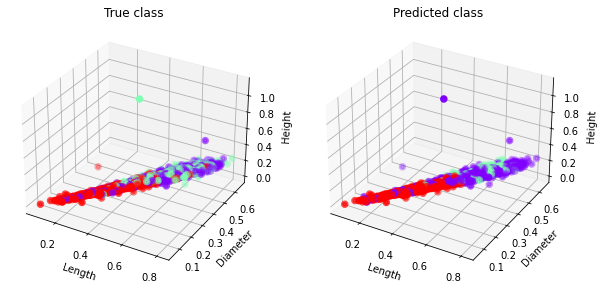

In [273]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(abalone.Length.values,\
           abalone.Diameter.values,\
           abalone.Height.values,\
           c=abalone['Sex'].values,\
           cmap=plt.cm.rainbow, \
           linewidths=3)
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Height')
ax.set_title('True class')


ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.scatter(abalone.Length.values,\
           abalone.Diameter.values,\
           abalone.Height.values,\
           c=y_pred_for_graph,\
           cmap=plt.cm.rainbow, \
           linewidths=3)
ax1.set_xlabel('Length')
ax1.set_ylabel('Diameter')
ax1.set_zlabel('Height')
ax1.set_title('Predicted class')

fig.savefig('data/3dscatter-abalone.jpeg',dpi=500)
fig.savefig('data/3dscatter-abalone.svg')